In [79]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Importing the data
df = pd.read_csv(r'C:\Users\paz\Downloads\Games.csv')

In [80]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [81]:
pd.set_option('display.max_rows', None)

In [83]:
# Searching for missing data
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_data))

Name - 0.0%
Sales - 0.0%
Series - 0.2057142857142857%
Release - 0.0%
Genre - 0.0%
Developer - 0.0%
Publisher - 0.0%


In [84]:
# Checking the data type of Sales column
print(df.Sales.dtypes)

float64


In [85]:
# Changing the data type of the sales column for making the code more arranged
df['Sales'] = df['Sales'].fillna(0)
df['Sales'] = df['Sales'].astype('int64')


In [86]:
# Checking the data type of Release column
print(df.Release.dtypes)

object


In [87]:
# Spliting the Release column, Creating a month and year column
d = pd.Series(df['Release'])
df['Month'] = d.str.split("-", expand = True)[0]
df['Year'] = d.str.split("-", expand = True)[1]

In [88]:
# Creating function taht will change the month to an int corresponding to the month.
def months(Month):
    if  Month == 'Dec':
        Month = 12
    if Month == 'Nov':
        Month = 11
    if Month == 'Oct':
        Month = 10
    if Month == 'Sep':
        Month = 9
    if Month == 'Aug':
        Month = 8
    if Month == 'Jul':
        Month = 7
    if Month == 'Jun':
        Month = 6
    if Month == 'May':
        Month = 5
    if Month == 'April':
        Month = 4
    if Month == 'Mar':
        Month = 3
    if Month == 'Feb':
        Month = 2
    if Month == 'Jan':
        Month = 1
    return Month

In [89]:
# Applying the function to the column Month
df['Month'] = df['Month'].apply(months)



In [90]:
# Creating a random number that i'll need in the next cell.
p = np.random.randint(15)
c = str(p)

In [91]:
# Bringing together the month and year column together into a new column. The random int will serve as the day.
df['Release_Date'] = df.Month.astype(str) + '/' + c + '/' + df.Year.astype(str)

In [92]:
# Changing the column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [93]:
# Dropping columns I don't need
# Rearranging the columns
# Checking the dataframe
df.drop(columns = ['Release','Month','Year'], axis = 1, inplace = True)
df = df.reindex(columns = ['Name','Release_Date','Sales','Series','Genre','Developer','Publisher'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          175 non-null    object        
 1   Release_Date  175 non-null    datetime64[ns]
 2   Sales         175 non-null    int64         
 3   Series        139 non-null    object        
 4   Genre         175 non-null    object        
 5   Developer     175 non-null    object        
 6   Publisher     175 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.7+ KB


In [94]:
pd.set_option('display.max_rows', 25)

In [95]:
df

,Name,Release_Date,Sales,Series,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,2017-12-12,42,NaN,Battle royale,PUBG Studios,Krafton
1,Minecraft,2011-11-12,33,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,2012-05-12,20,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,2006-11-12,20,NaN,Sandbox,Facepunch Studios,Valve
4,Terraria,2011-05-12,17,NaN,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,2003-03-12,1,Vietcong,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,2008-09-12,1,Warhammer,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1999-11-12,1,NaN,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1994-12-12,1,Wing Commander,Space combat simulation,Origin Systems,Electronic Arts


In [96]:
# Making the sales column more clearly to read
df.rename({'Sales' : 'Sales_in_millions'}, axis = 1, inplace = True )

In [97]:
df.head()

,Name,Release_Date,Sales_in_millions,Series,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,2017-12-12,42,NaN,Battle royale,PUBG Studios,Krafton
1,Minecraft,2011-11-12,33,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,2012-05-12,20,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,2006-11-12,20,NaN,Sandbox,Facepunch Studios,Valve
4,Terraria,2011-05-12,17,NaN,Action-adventure,Re-Logic,Re-Logic


In [98]:
# Drop duplicates if there any
df.drop_duplicates()

,Name,Release_Date,Sales_in_millions,Series,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,2017-12-12,42,NaN,Battle royale,PUBG Studios,Krafton
1,Minecraft,2011-11-12,33,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,2012-05-12,20,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,2006-11-12,20,NaN,Sandbox,Facepunch Studios,Valve
4,Terraria,2011-05-12,17,NaN,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,2003-03-12,1,Vietcong,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,2008-09-12,1,Warhammer,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1999-11-12,1,NaN,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1994-12-12,1,Wing Commander,Space combat simulation,Origin Systems,Electronic Arts


In [99]:
# Assining a random numeric value for each category using factorize

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Name,Release_Date,Sales_in_millions,Series,Genre,Developer,Publisher
Name,1.000000,0.804916,0.714244,0.614024,0.496175,0.864141,0.615424
Release_Date,0.804916,1.000000,0.641110,0.491925,0.425394,0.687965,0.554113
Sales_in_millions,0.714244,0.641110,1.000000,0.436864,0.385397,0.587069,0.504860
Series,0.614024,0.491925,0.436864,1.000000,0.346629,0.588041,0.331250
Genre,0.496175,0.425394,0.385397,0.346629,1.000000,0.523483,0.536523
Developer,0.864141,0.687965,0.587069,0.588041,0.523483,1.000000,0.665303
Publisher,0.615424,0.554113,0.504860,0.331250,0.536523,0.665303,1.000000


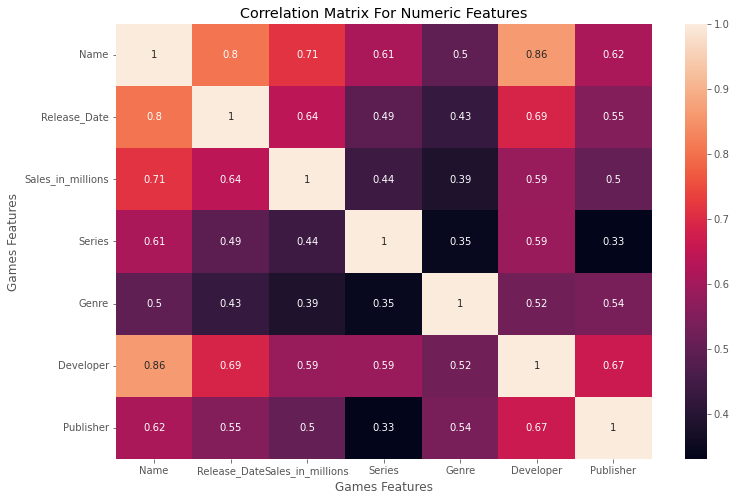

In [100]:
# Searching for high correlation
correlation_matrix2 = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix2, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Games Features')

plt.ylabel('Games Features')

plt.show()

In [101]:
correlation_matrix3 = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_matrix3.unstack()

print(corr_pairs)

Name       Name                 1.000000
           Release_Date         0.804916
           Sales_in_millions    0.714244
           Series               0.614024
           Genre                0.496175
                                  ...   
Publisher  Sales_in_millions    0.504860
           Series               0.331250
           Genre                0.536523
           Developer            0.665303
           Publisher            1.000000
Length: 49, dtype: float64


In [102]:
sorted_pairs = corr_pairs.sort_values()  

print(sorted_pairs)

Series             Publisher            0.331250
Publisher          Series               0.331250
Series             Genre                0.346629
Genre              Series               0.346629
                   Sales_in_millions    0.385397
                                          ...   
                   Genre                1.000000
Sales_in_millions  Sales_in_millions    1.000000
Release_Date       Release_Date         1.000000
Developer          Developer            1.000000
Publisher          Publisher            1.000000
Length: 49, dtype: float64


In [103]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

print(high_corr)

Sales_in_millions  Publisher            0.504860
Publisher          Sales_in_millions    0.504860
Developer          Genre                0.523483
Genre              Developer            0.523483
Publisher          Genre                0.536523
                                          ...   
Genre              Genre                1.000000
Sales_in_millions  Sales_in_millions    1.000000
Release_Date       Release_Date         1.000000
Developer          Developer            1.000000
Publisher          Publisher            1.000000
Length: 35, dtype: float64


In [104]:
# As we can see in the correlation i did, i found that the Developer company has a big impact and high correlation to the sales 

In [105]:
df.head()

,Name,Release_Date,Sales_in_millions,Series,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,2017-12-12,42,NaN,Battle royale,PUBG Studios,Krafton
1,Minecraft,2011-11-12,33,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,2012-05-12,20,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,2006-11-12,20,NaN,Sandbox,Facepunch Studios,Valve
4,Terraria,2011-05-12,17,NaN,Action-adventure,Re-Logic,Re-Logic


In [106]:
# Checking which Genre is the most popular
df['Genre'].value_counts().idxmax()

'Real-time strategy'

In [107]:
# Checking which publisher published most of the games
df['Publisher'].mode()

0    Electronic Arts
dtype: object

In [108]:
# For going farther with the analysis I will create a grade column based on sales
def m(Sales, Grade):
    if Sales > 30:
        Grade = 'A'
    elif 10 <= Sales <= 30:
        Grade = 'B'
    elif 5 <= Sales < 10:
        Grade = 'C'
    elif 2 <= Sales < 5:
        Grade = 'D'
    elif Sales < 2:
        Grade = 'F'
    return Grade

In [110]:
# Creating the grade column and then applying the fuction to that column
df['Grade'] = 0
df['Grade'] = df.apply(lambda x:m(x['Sales_in_millions'], x['Grade']), axis = 1)
df.head()

,Name,Release_Date,Sales_in_millions,Series,Genre,Developer,Publisher,Grade
0,PlayerUnknown's Battlegrounds,2017-12-12,42,NaN,Battle royale,PUBG Studios,Krafton,A
1,Minecraft,2011-11-12,33,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios,A
2,Diablo III,2012-05-12,20,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,B
3,Garry's Mod,2006-11-12,20,NaN,Sandbox,Facepunch Studios,Valve,B
4,Terraria,2011-05-12,17,NaN,Action-adventure,Re-Logic,Re-Logic,B


In [111]:
df.Release_Date.describe(datetime_is_numeric= True)

count                              175
mean     2005-08-04 09:11:18.857142912
min                1984-12-12 00:00:00
25%                1999-04-11 12:00:00
50%                2004-10-12 00:00:00
75%                2012-10-12 00:00:00
max                2021-02-12 00:00:00
Name: Release_Date, dtype: object

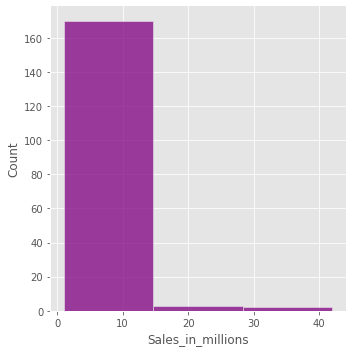

In [113]:
# Checking the Sales using seaborn
sns.displot(df.Sales_in_millions, bins = 3, color = 'purple')


<AxesSubplot:ylabel='Name'>

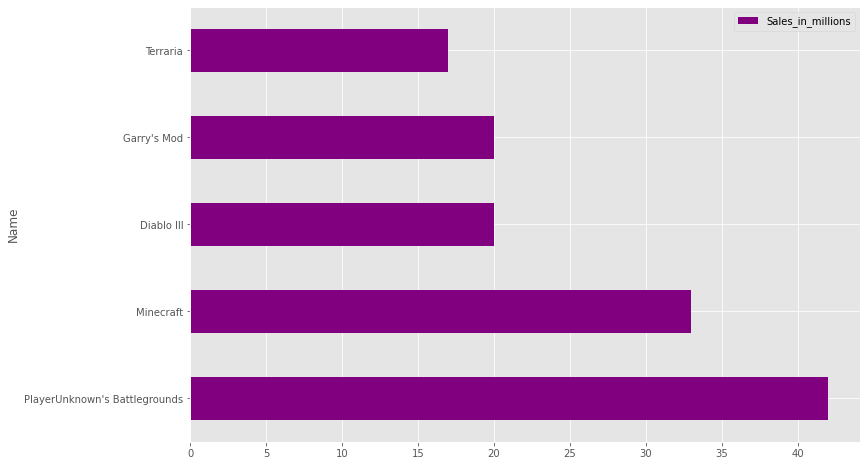

In [114]:
# Showing the highest game sales
dr = pd.pivot_table(df, index = 'Name', values = ['Sales_in_millions'], aggfunc = np.sum)
dr.sort_values(by = 'Sales_in_millions', ascending = False).head().plot(kind = 'barh', color = 'purple')

<AxesSubplot:xlabel='Release_Date'>

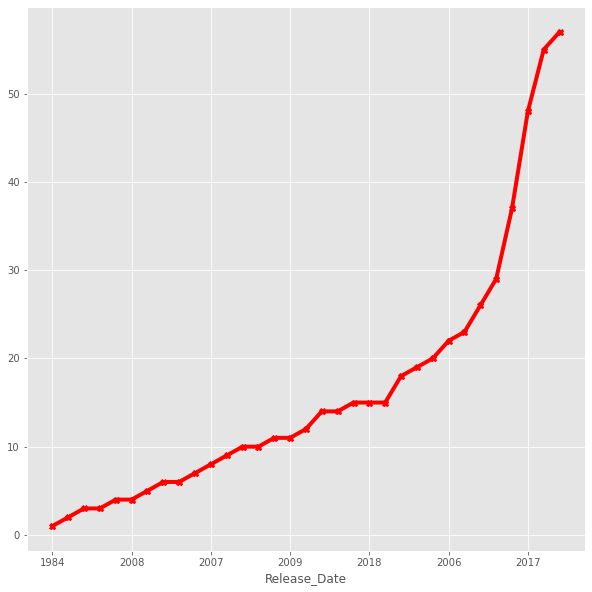

In [116]:
# Showing the games releasing date over the years
df.groupby(df['Release_Date'].dt.strftime('%G')).Sales_in_millions.sum().sort_values(ascending = True).plot(color = 'red',lw = 4, ls = '-', marker = 'X', figsize =(10,10))

In [ ]:
# As we can see as the years go by more and more games come out

<AxesSubplot:ylabel='Genre'>

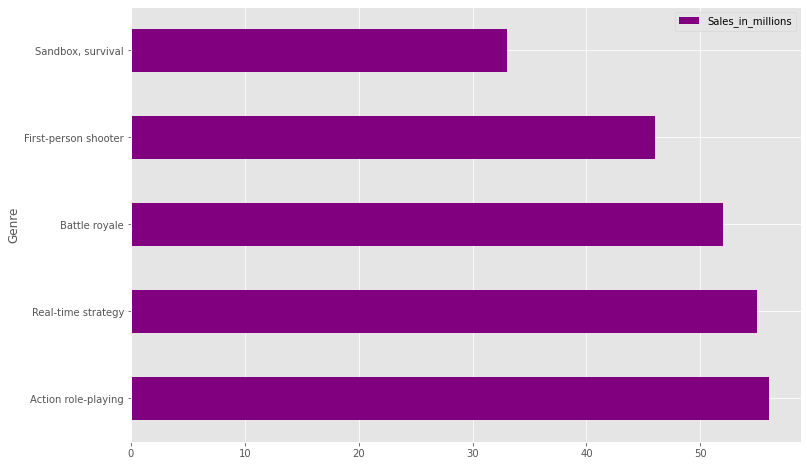

In [124]:
pt = pd.pivot_table(df, index = 'Genre', values = ['Sales_in_millions'], aggfunc = np.sum)
pt.sort_values(by = 'Sales_in_millions', ascending = False).head().plot(kind = 'barh', color = 'purple')

In [ ]:
""" For a reminder, earlier I checked which Genre of games is the most popular
and it was real time strategy.
Now we can see that altough real time strategy is the popularest, action role playing is
sells more """


<AxesSubplot:ylabel='Publisher'>

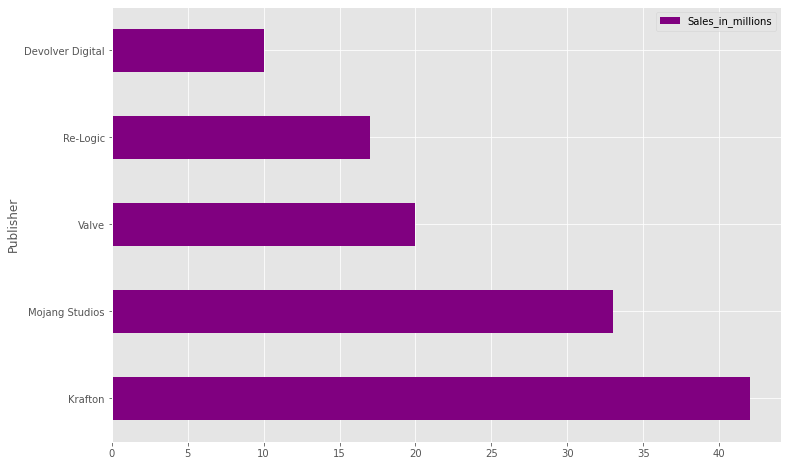

In [125]:
le = pd.pivot_table(df, index = 'Publisher', values = ['Sales_in_millions'])
le.sort_values(by = 'Sales_in_millions', ascending = False).head().plot(color = 'purple',kind = 'barh')


In [143]:
# Same here, altough Electronic Arts published most of the games Krafton is sells more

In [126]:
df.Grade.nunique()


5

C:\Users\paz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

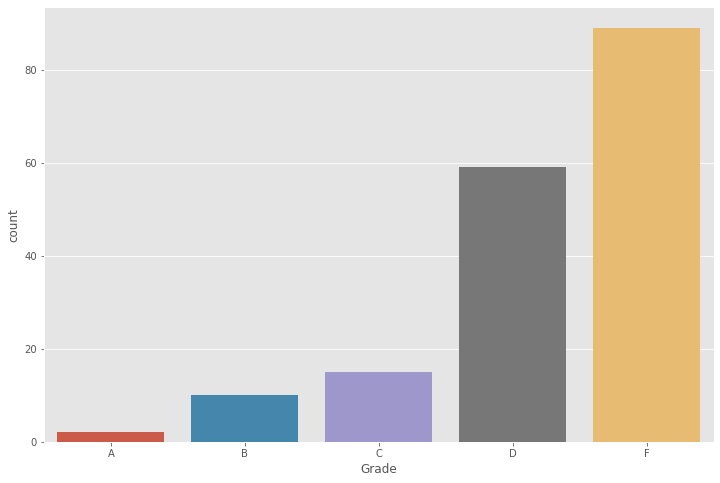

In [127]:
# Showing the grades (that I defined earlier) of the games
sns.countplot(df.Grade)


<AxesSubplot:title={'center':'# of F in Category'}, ylabel='Publisher'>

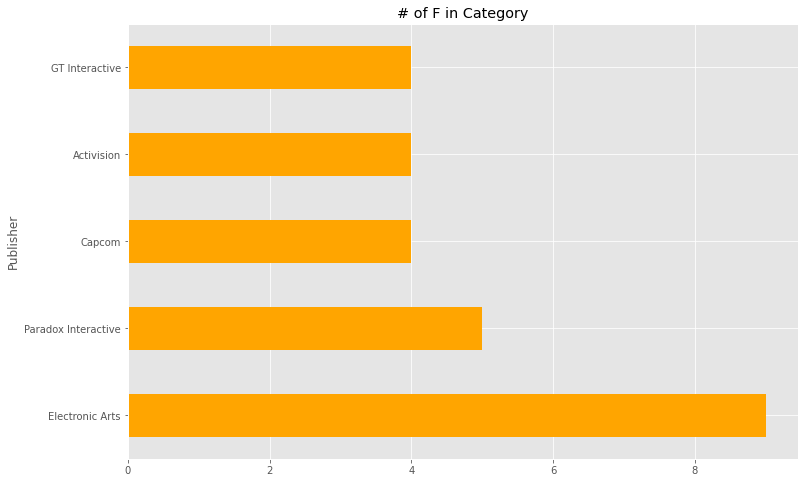

In [139]:
# Showing publishers that weren't the best on sales
p = pd.crosstab(df.Publisher, df.Grade).sort_values(by = 'F', ascending = False)
p.query('F >= 4')
p['F'].head().plot(kind = 'barh', color = 'orange', title = '# of F in Category')

In [ ]:
""" As we can see Electronic Arts have the largest amount of games 
but not all their games are the best ones """